# Problem Setting: Creditworthiness Prediction

## Objective

Given the available applicant and loan information, **predict whether a credit applicant is creditworthy or not**. This supports financial institutions in making lending decisions and managing risk by assessing the likelihood that an individual will be a good or bad credit risk.

## Formal Definition

- **Problem**
  Predict whether a credit applicant is creditworthy or not
  
- **Learning Task:**  
  Supervised learning — specifically a **binary classification** problem.

- **Input Attributes (Features):**  
  Let \( X \) be the feature vector describing each loan application. The feature set includes both applicant characteristics and loan details, such as:
  - checking_account_status
  - duration_months
  - credit_history
  - purpose
  - credit_amount
  - savings_account
  - present_employment_since
  - installment_rate_percent
  - personal_status_sex
  - other_debtors_guarantors
  - present_residence_since
  - property
  - age_in_years
  - other_installment_plans
  - housing
  - number_existing_credits
  - job
  - number_people_liable
  - telephone
  - foreign_worker

  Formally, \( X = (x_1, x_2, ..., x_{20}) \).

- **Target Variable (Label):**  
  Let \( y \) be the binary target variable:
    - \( y = 1 \): Applicant is **creditworthy** (good credit risk)
    - \( y = 2 \): Applicant is **not creditworthy**

- **Evaluation Using the Project Cost Model:**

    - Misclassification cost:
      - Cost = 5 × False Positives (FP) + 1 × False Negatives (FN)

    - Definitions:
      - ( FP ): Predict ( y_pred = 1 ) when ( y_true = 2 ); higher penalty (5).
      - ( FN ): Predict ( y_pred = 2 ) when ( y_true = 1 ); lower penalty (1).


In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, roc_curve, auc, precision_recall_curve
from sklearn.metrics import accuracy_score, roc_auc_score

## Data Loading

In [26]:
df = pd.read_csv('kredit.dat', delimiter='\t', header=None, na_values='?')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,A14,36,A32,NaN,2299,A63,NaN,4,A93,A101,...,A123,39,A143,A152,1,A173,1,A191,NaN,1
1,A12,18,A32,A46,1239,A65,A73,4,A93,A101,...,A124,61,A143,A153,1,NaN,1,A191,A201,1
2,A13,24,A32,A40,947,A61,A74,4,A93,A101,...,A124,38,A141,A153,1,NaN,2,A191,NaN,2
3,A14,15,A33,A43,1478,A61,A73,4,A94,A101,...,A121,33,A141,A152,2,A173,1,A191,A201,1
4,A14,24,A32,A40,1525,A64,A74,4,A92,A101,...,A123,34,A143,A152,1,A173,2,A192,A201,1


In [27]:
column_names = [
    "checking_account_status",
    "duration_months",
    "credit_history",
    "purpose",
    "credit_amount",
    "savings_account",
    "present_employment_since",
    "installment_rate_percent",
    "personal_status_sex",
    "other_debtors_guarantors",
    "present_residence_since",
    "property",
    "age_in_years",
    "other_installment_plans",
    "housing",
    "number_existing_credits",
    "job",
    "number_people_liable",
    "telephone",
    "foreign_worker",
    "creditworthy"
]

df.columns = column_names
df.head()

,checking_account_status,duration_months,credit_history,purpose,credit_amount,savings_account,present_employment_since,installment_rate_percent,personal_status_sex,other_debtors_guarantors,...,property,age_in_years,other_installment_plans,housing,number_existing_credits,job,number_people_liable,telephone,foreign_worker,creditworthy
0,A14,36,A32,NaN,2299,A63,NaN,4,A93,A101,...,A123,39,A143,A152,1,A173,1,A191,NaN,1
1,A12,18,A32,A46,1239,A65,A73,4,A93,A101,...,A124,61,A143,A153,1,NaN,1,A191,A201,1
2,A13,24,A32,A40,947,A61,A74,4,A93,A101,...,A124,38,A141,A153,1,NaN,2,A191,NaN,2
3,A14,15,A33,A43,1478,A61,A73,4,A94,A101,...,A121,33,A141,A152,2,A173,1,A191,A201,1
4,A14,24,A32,A40,1525,A64,A74,4,A92,A101,...,A123,34,A143,A152,1,A173,2,A192,A201,1


## Data Exploration

In [28]:
print("The shape of the dataframe is", df.shape)

The shape of the dataframe is (1000, 21)


In [29]:
print("The information about dataframe is ", df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   checking_account_status   1000 non-null   object
 1   duration_months           1000 non-null   int64 
 2   credit_history            1000 non-null   object
 3   purpose                   827 non-null    object
 4   credit_amount             1000 non-null   int64 
 5   savings_account           1000 non-null   object
 6   present_employment_since  504 non-null    object
 7   installment_rate_percent  1000 non-null   int64 
 8   personal_status_sex       1000 non-null   object
 9   other_debtors_guarantors  1000 non-null   object
 10  present_residence_since   1000 non-null   int64 
 11  property                  1000 non-null   object
 12  age_in_years              1000 non-null   int64 
 13  other_installment_plans   1000 non-null   object
 14  housing                  

In [30]:
print("The statistical characteristics is ", df.describe())

The statistical characteristics is         duration_months  credit_amount  installment_rate_percent  \
count      1000.000000    1000.000000               1000.000000   
mean         20.903000    3271.258000                  2.973000   
std          12.058814    2822.736876                  1.118715   
min           4.000000     250.000000                  1.000000   
25%          12.000000    1365.500000                  2.000000   
50%          18.000000    2319.500000                  3.000000   
75%          24.000000    3972.250000                  4.000000   
max          72.000000   18424.000000                  4.000000   

       present_residence_since  age_in_years  number_existing_credits  \
count              1000.000000   1000.000000              1000.000000   
mean                  2.845000     35.546000                 1.407000   
std                   1.103718     11.375469                 0.577654   
min                   1.000000     19.000000                 1.00000

In [31]:
# Get categorical columns (object type)
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Get numerical columns (int64, float64)
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
if 'creditworthy' in numerical_cols:
    numerical_cols.remove('creditworthy')

print("Categorical columns:", categorical_cols)
print("Numerical columns:", numerical_cols)

Categorical columns: ['checking_account_status', 'credit_history', 'purpose', 'savings_account', 'present_employment_since', 'personal_status_sex', 'other_debtors_guarantors', 'property', 'other_installment_plans', 'housing', 'job', 'telephone', 'foreign_worker']
Numerical columns: ['duration_months', 'credit_amount', 'installment_rate_percent', 'present_residence_since', 'age_in_years', 'number_existing_credits', 'number_people_liable']


## Data Visualization

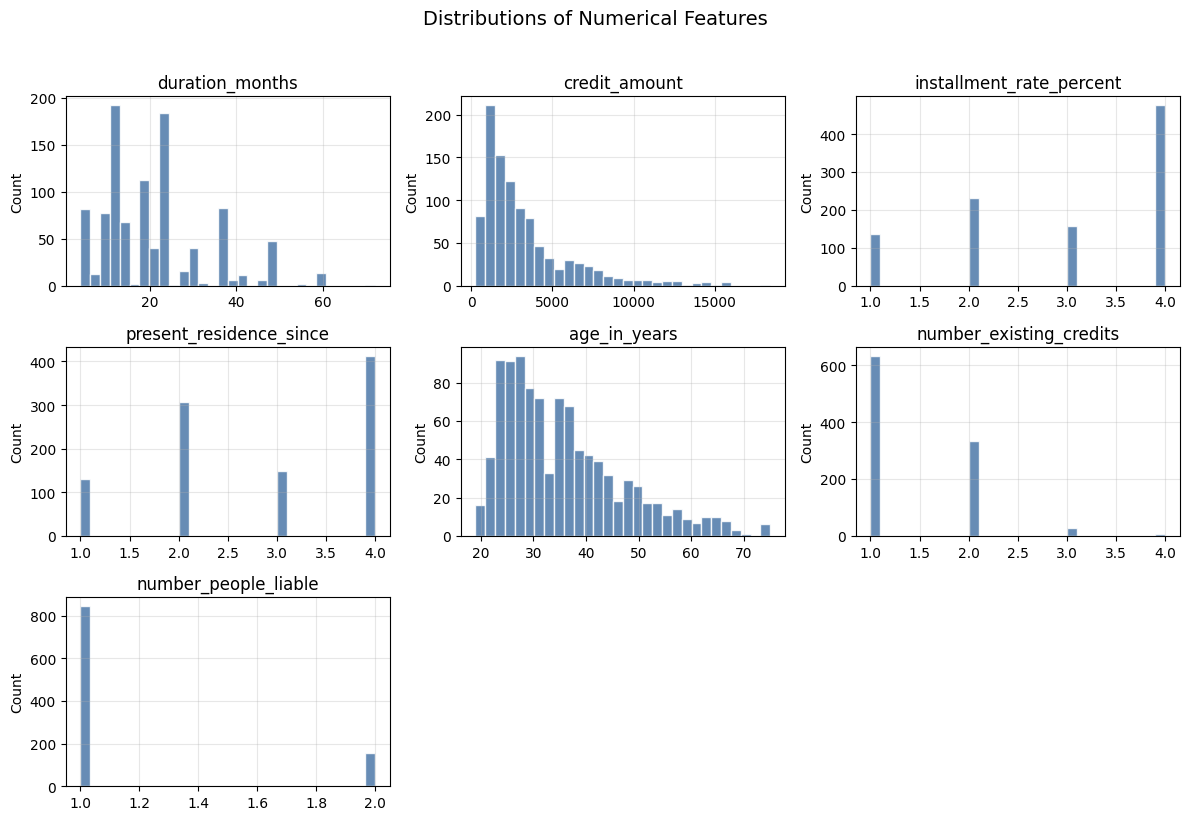

In [32]:
axes = df[numerical_cols].hist(
    bins=30, figsize=(12, 8), color='#4C78A8', edgecolor='white', alpha=0.85
)
for ax in axes.ravel():
    ax.grid(alpha=0.3)
    ax.set_xlabel('')
    ax.set_ylabel('Count')

plt.suptitle('Distributions of Numerical Features', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

- Credit_amount is strongly right‑skewed with a long high‑value tail, duration_months concentrates between roughly 6–36 months, and age_in_years clusters in the mid‑20s to mid‑40s, indicating the use of scaling methods
- installment_rate_percent, present_residence_since, number_existing_credits, and number_people_liable show few discrete values with heavy mass on specific bins, suggesting treatment as ordinal features rather than continuous variables for many models.

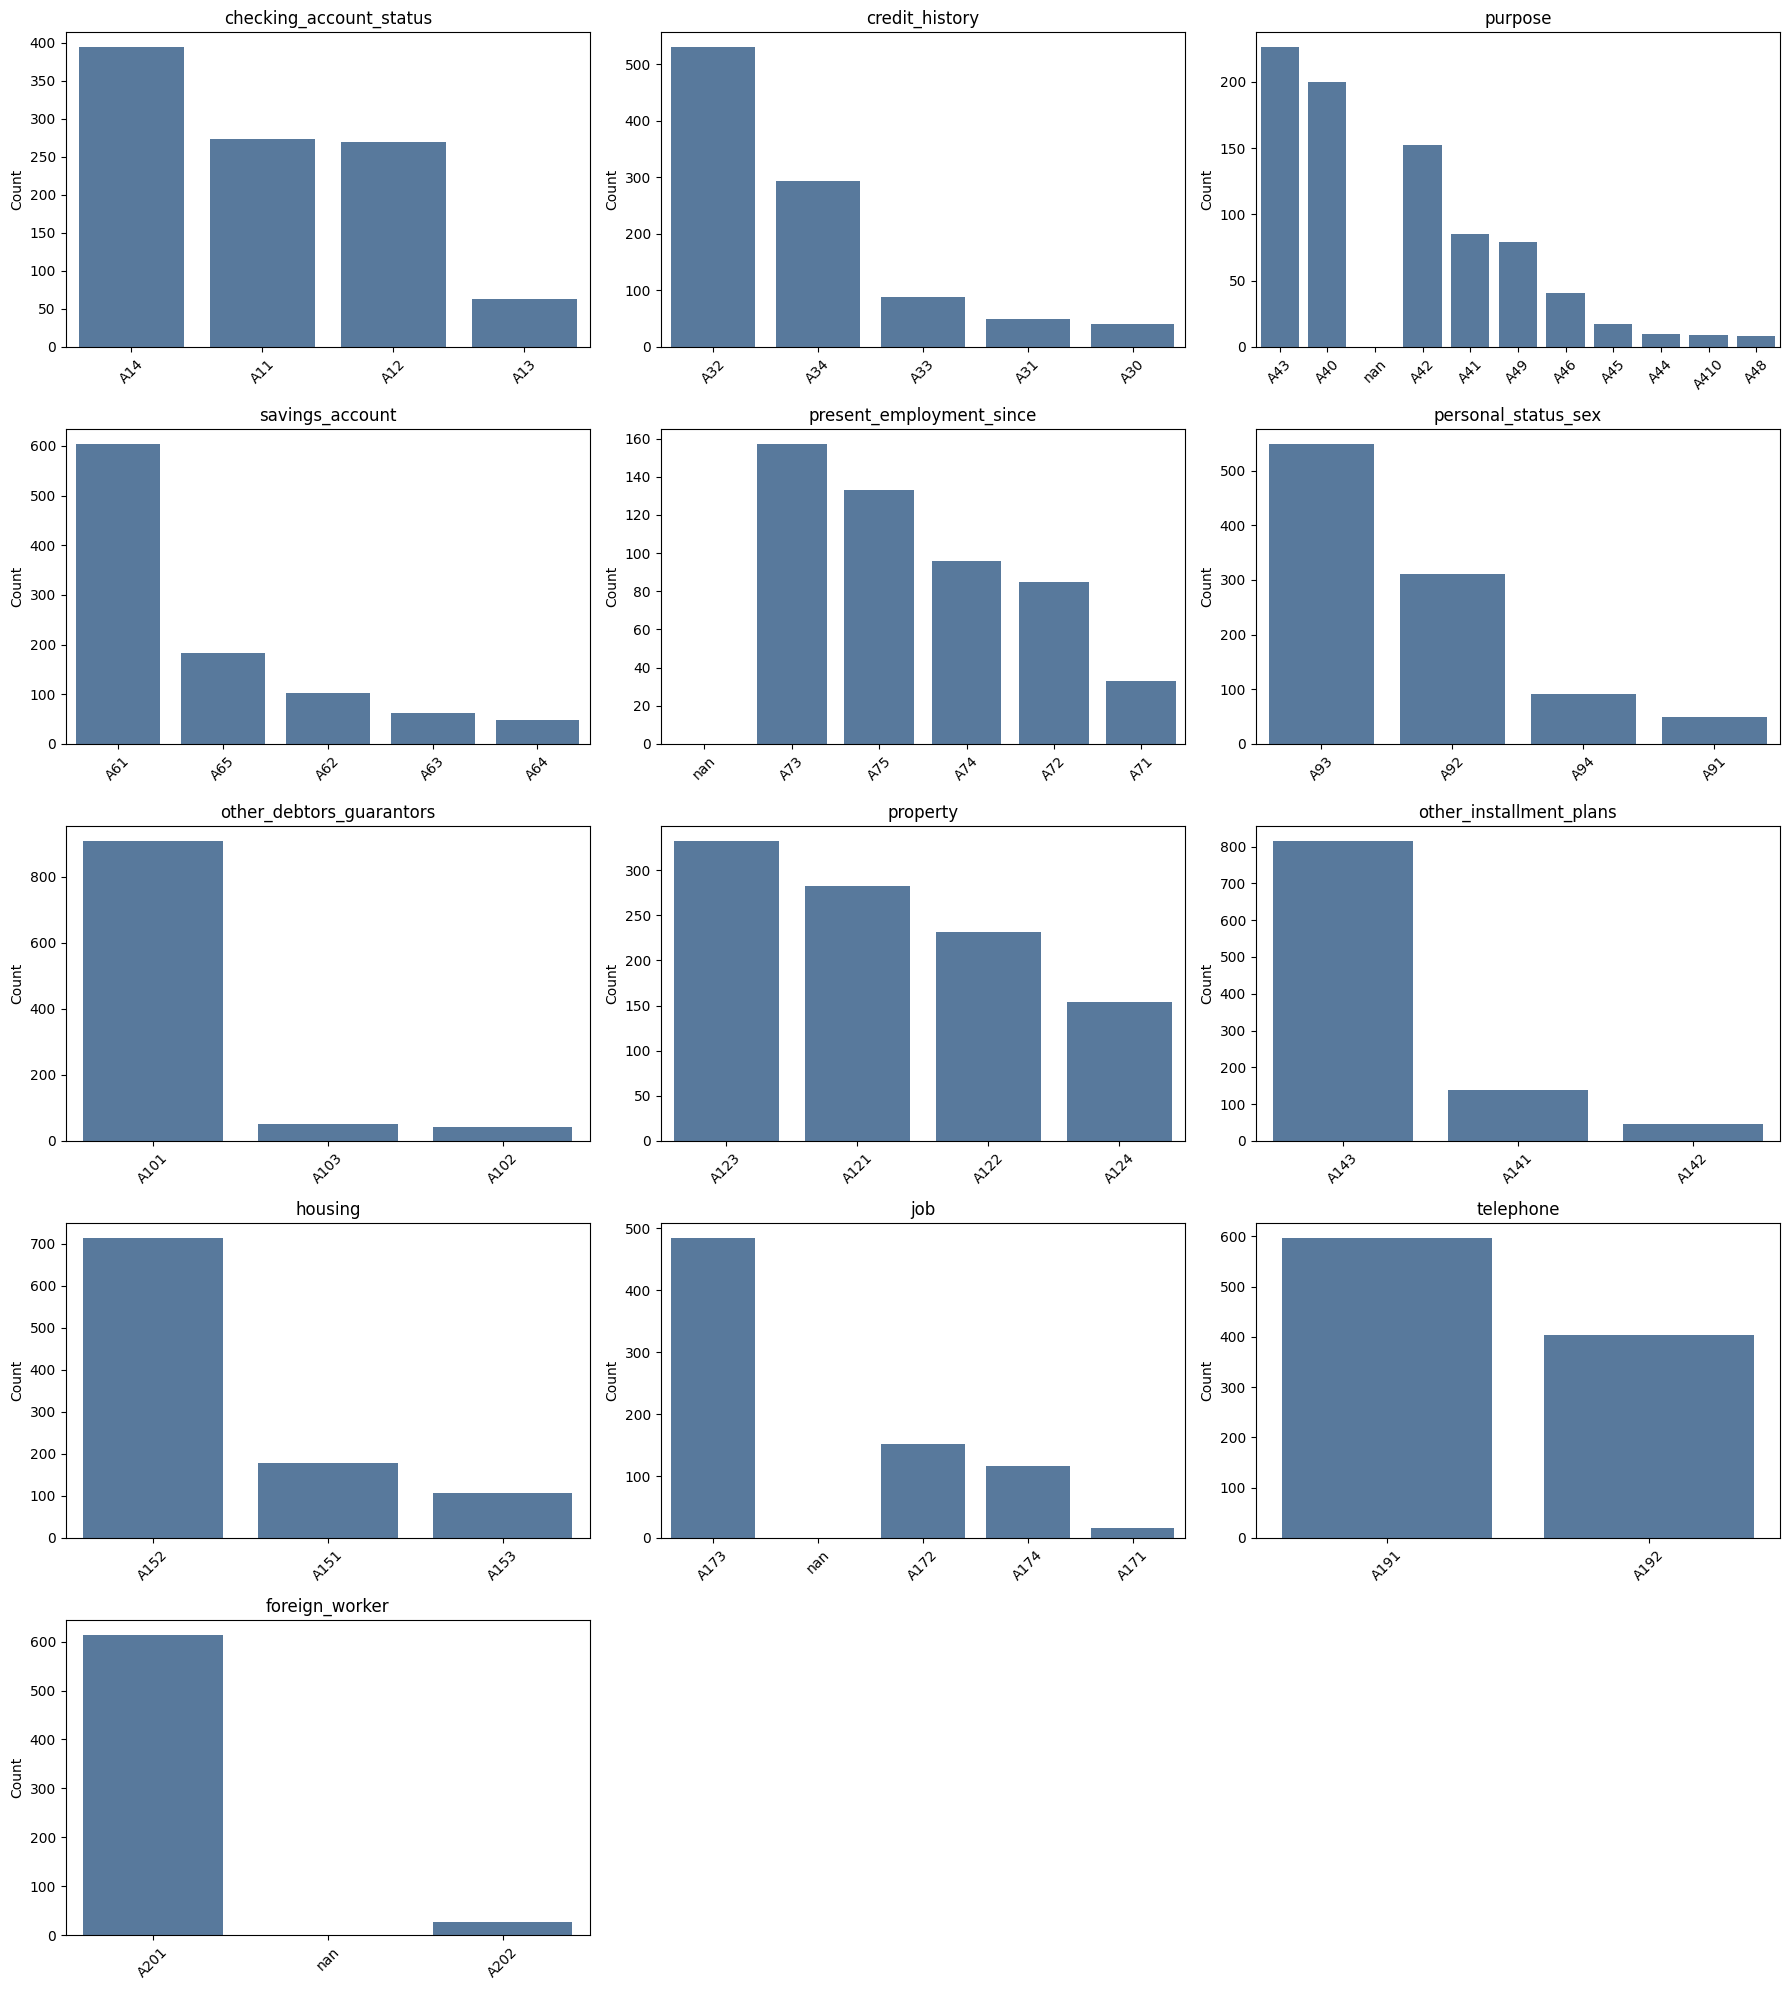

In [33]:
cols_per_row = 3
rows = int(np.ceil(len(categorical_cols) / cols_per_row))
fig, axes = plt.subplots(rows, cols_per_row, figsize=(6*cols_per_row, 4*rows))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, data=df, ax=axes[i], order=df[col].value_counts(dropna=False).index, color="#4C78A8")
    axes[i].set_title(col)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Count")
    for tick in axes[i].get_xticklabels():
        tick.set_rotation(45)

# Remove unused axes
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

- The categorical features are highly imbalanced, with dominant modes in several variables (e.g., checking_account_status, savings_account, telephone, foreign_worker) and a long‑tail distribution for purpose, plus a few missing categories, indicating skewed class frequencies across many fields.
- Some variables are near‑binary or low‑cardinality (telephone, foreign_worker, other_installment_plans), while others have many rare levels (purpose, property),

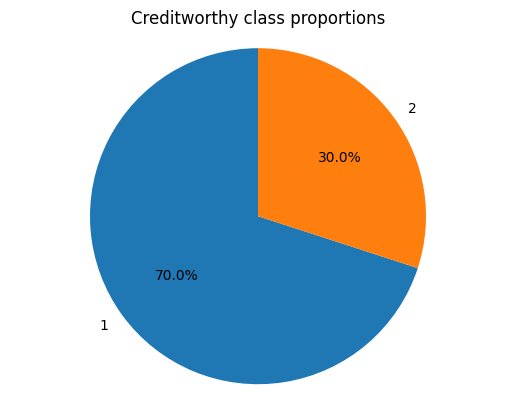

In [34]:
vals = df['creditworthy'].value_counts().sort_index()
plt.pie(vals.values, labels=vals.index.astype(str), autopct='%1.1f%%', startangle=90)
plt.title('Creditworthy class proportions')
plt.axis('equal')
plt.show()

- The chart shows a majority of class 1 and a minority of class 2, indicating a moderately imbalanced target and suggesting stratified validation and metrics beyond accuracy for evaluation

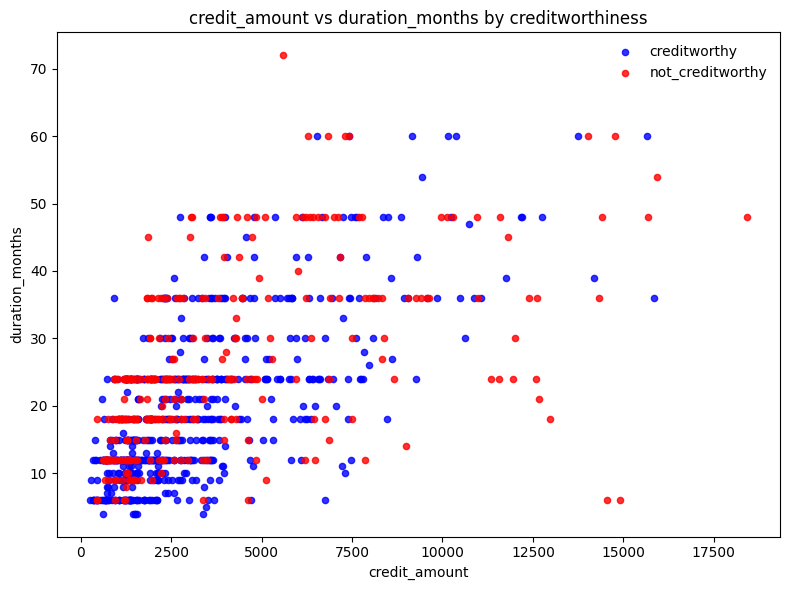

In [35]:
# Boolean masks per class
is_good = df["creditworthy"] == 1
is_bad  = df["creditworthy"] == 2

plt.figure(figsize=(8, 6))

plt.scatter(
    df.loc[is_good, "credit_amount"],
    df.loc[is_good, "duration_months"],
    s=20, alpha=0.8, c="blue", label="creditworthy"
)

plt.scatter(
    df.loc[is_bad, "credit_amount"],
    df.loc[is_bad, "duration_months"],
    s=20, alpha=0.8, c="red", label="not_creditworthy"
)

plt.xlabel("credit_amount")
plt.ylabel("duration_months")
plt.title("credit_amount vs duration_months by creditworthiness")
plt.legend(frameon=False)
plt.tight_layout()
plt.show()


- Most observations cluster at low credit_amount and shorter durations with heavy class overlap, and only sparse separation appears at very high amounts/durations, indicating weak linear separability between creditworthy and not_creditworthy for just these two features

## Handling Missing Values

In [105]:
# 1. Check columns with missing values and count how many missing in each
missing_counts = df.isna().sum()
print("Columns with missing values: ")
print(missing_counts[missing_counts > 0])

Columns with missing values: 
purpose                     173
present_employment_since    496
job                         232
foreign_worker              360
dtype: int64


In [106]:
missing_cols = ['purpose', 'present_employment_since', 'job', 'foreign_worker']
impute_df = df.copy()

for target in missing_cols:
    # Split data rows with known and missing target
    known = impute_df[impute_df[target].notna()]
    missing = impute_df[impute_df[target].isna()]

    if missing.empty or known.empty:
        continue

    predictors = [col for col in impute_df.columns if col not in [target, 'creditworthy']]

    # Encode all predictors as categorical codes
    X_train = known[predictors].apply(lambda x: x.astype('category').cat.codes)
    y_train = known[target]
    X_missing = missing[predictors].apply(lambda x: x.astype('category').cat.codes)

    # Train and predict using Decision Tree
    clf = DecisionTreeClassifier(criterion="entropy", random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_missing)

    # Impute missing target values
    impute_df.loc[missing.index, target] = y_pred

print("Missing values after imputation:")
print(impute_df[missing_cols].isna().sum())

df_imputed = impute_df.copy()


Missing values after imputation:
purpose                     0
present_employment_since    0
job                         0
foreign_worker              0
dtype: int64


In [107]:
df_imputed.head()

,checking_account_status,duration_months,credit_history,purpose,credit_amount,savings_account,present_employment_since,installment_rate_percent,personal_status_sex,other_debtors_guarantors,...,property,age_in_years,other_installment_plans,housing,number_existing_credits,job,number_people_liable,telephone,foreign_worker,creditworthy
0,A14,36,A32,A43,2299,A63,A75,4,A93,A101,...,A123,39,A143,A152,1,A173,1,A191,A201,1
1,A12,18,A32,A46,1239,A65,A73,4,A93,A101,...,A124,61,A143,A153,1,A173,1,A191,A201,1
2,A13,24,A32,A40,947,A61,A74,4,A93,A101,...,A124,38,A141,A153,1,A172,2,A191,A201,2
3,A14,15,A33,A43,1478,A61,A73,4,A94,A101,...,A121,33,A141,A152,2,A173,1,A191,A201,1
4,A14,24,A32,A40,1525,A64,A74,4,A92,A101,...,A123,34,A143,A152,1,A173,2,A192,A201,1


## Data Preprocessing

### One Hot Encoding 

In [39]:
df_encoded = pd.get_dummies(df_imputed,
                            columns=categorical_cols,
                            dummy_na=False,     
                            drop_first=False,
                            dtype='int8',
                            prefix=categorical_cols)

In [40]:
df_encoded.head()

,duration_months,credit_amount,installment_rate_percent,present_residence_since,age_in_years,number_existing_credits,number_people_liable,creditworthy,checking_account_status_A11,checking_account_status_A12,...,housing_A152,housing_A153,job_A171,job_A172,job_A173,job_A174,telephone_A191,telephone_A192,foreign_worker_A201,foreign_worker_A202
0,36,2299,4,4,39,1,1,1,0,0,...,1,0,0,0,1,0,1,0,1,0
1,18,1239,4,4,61,1,1,1,0,1,...,0,1,0,0,1,0,1,0,1,0
2,24,947,4,3,38,1,2,2,0,0,...,0,1,0,0,1,0,1,0,1,0
3,15,1478,4,3,33,2,1,1,0,0,...,1,0,0,0,1,0,1,0,1,0
4,24,1525,4,3,34,1,2,1,0,0,...,1,0,0,0,1,0,0,1,1,0


### Standardization

- Standardization (z-scores) stabilizes optimization for scale‑sensitive models (logistic regression, SVM, KNN) and is less driven by a few extremes than MinMax, which anchors the whole range to the smallest and largest observed values.

- MinMax is better when a fixed range is required or features are naturally bounded (e.g: pixels). Here, skew and outliers could affect the MinMax Scaler , so standardization is preferred.

In [41]:
for col in numerical_cols:
    mean = df_encoded[col].mean()
    std = df_encoded[col].std()
    df_encoded[col] = (df_encoded[col] - mean) / std

In [42]:
df_encoded.head()

,duration_months,credit_amount,installment_rate_percent,present_residence_since,age_in_years,number_existing_credits,number_people_liable,creditworthy,checking_account_status_A11,checking_account_status_A12,...,housing_A152,housing_A153,job_A171,job_A172,job_A173,job_A174,telephone_A191,telephone_A192,foreign_worker_A201,foreign_worker_A202
0,1.251947,-0.344438,0.918018,1.046463,0.303636,-0.704573,-0.428075,1,0,0,...,1,0,0,0,1,0,1,0,1,0
1,-0.240737,-0.719960,0.918018,1.046463,2.237622,-0.704573,-0.428075,1,0,1,...,0,1,0,0,1,0,1,0,1,0
2,0.256825,-0.823406,0.918018,0.140434,0.215727,-0.704573,2.333701,2,0,0,...,0,1,0,0,1,0,1,0,1,0
3,-0.489517,-0.635291,0.918018,0.140434,-0.223815,1.026565,-0.428075,1,0,0,...,1,0,0,0,1,0,1,0,1,0
4,0.256825,-0.618640,0.918018,0.140434,-0.135906,-0.704573,2.333701,1,0,0,...,1,0,0,0,1,0,0,1,1,0


## Baseline Model (Majority Class Prediction)

In [43]:
X = df_encoded.drop(columns=['creditworthy'])
y = df_encoded['creditworthy']

In [44]:
def create_kfold_mask(num_samples, k):
    masks = []
    fold_size = num_samples / k
    for i in range(k):
        mask = np.zeros(num_samples, dtype=bool)
        mask[int(i * fold_size):int((i + 1) * fold_size)] = True
        masks.append(mask)
    return masks

def cross_validate_majority_baseline(X, y, k_folds=5, shuffle=True, random_state=42, plot_roc=True):
    """
    Majority-class baseline with manual K-fold (masks), project cost, and ROC collection.
    """
    X = np.asarray(X)
    y = np.asarray(y)

    rng = np.random.RandomState(random_state)
    perm = rng.permutation(len(X)) if shuffle else np.arange(len(X))
    X_shuf, y_shuf = X[perm], y[perm]

    masks = create_kfold_mask(len(X_shuf), k_folds)

    accuracies, precisions, recalls, costs = [], [], [], []
    fprs, tprs, aucs, labels = [], [], [], []

    for fold, val_mask in enumerate(masks, 1):
        train_mask = ~val_mask
        y_train = y_shuf[train_mask]
        y_val   = y_shuf[val_mask]

        # Majority class from TRAIN fold
        classes, counts = np.unique(y_train, return_counts=True)
        majority_class = classes[np.argmax(counts)]

        # Predict majority
        y_pred = np.full_like(y_val, fill_value=majority_class)

        # Standard metrics (positive = 1)
        acc  = accuracy_score(y_val, y_pred)
        prec = precision_score(y_val, y_pred, pos_label=1, zero_division=0)
        rec  = recall_score(y_val, y_pred, pos_label=1, zero_division=0)
        accuracies.append(acc); precisions.append(prec); recalls.append(rec)

        # Project cost: 5*FP + 1*FN
        y_val_bin  = np.where(y_val == 1, 1, 0)
        y_pred_bin = np.where(y_pred == 1, 1, 0)
        fp = np.sum((y_pred_bin == 1) & (y_val_bin == 0))
        fn = np.sum((y_pred_bin == 0) & (y_val_bin == 1))
        cost = 5 * fp + fn
        costs.append(cost)

        # ROC/AUC per fold (only if both classes present)
        fold_auc = np.nan
        if len(np.unique(y_val_bin)) > 1:
            fpr, tpr, _ = roc_curve(y_val_bin, y_pred_bin)  # y_score for baseline = predicted class indicator
            fold_auc = auc(fpr, tpr)
            fprs.append(fpr); tprs.append(tpr)
        else:
            fprs.append(None); tprs.append(None)
        aucs.append(fold_auc)

        # Print including AUC per fold
        auc_str = "nan" if np.isnan(fold_auc) else f"{fold_auc:.4f}"
        print(f"Fold {fold} | acc: {acc:.4f}, prec: {prec:.4f}, rec: {rec:.4f}, cost: {cost}, auc: {auc_str}")

    # Average metrics
    print(f"\nAverage over {k_folds} folds:")
    print(f"Accuracy: {np.mean(accuracies):.4f}")
    print(f"Precision: {np.mean(precisions):.4f}")
    print(f"Recall: {np.mean(recalls):.4f}")

    valid_aucs = [a for a in aucs if not np.isnan(a)]
    avg_auc = float(np.mean(valid_aucs)) if len(valid_aucs) > 0 else np.nan
    if np.isnan(avg_auc):
        print("Average AUC: nan")
    else:
        print(f"Average AUC: {avg_auc:.4f}")

    print(f"Average Cost: {np.mean(costs):.2f}")

    return {
        "accuracy": float(np.mean(accuracies)),
        "precision": float(np.mean(precisions)),
        "recall": float(np.mean(recalls)),
        "avg_cost": float(np.mean(costs)),
        "fprs": fprs,
        "tprs": tprs,
        "aucs": aucs,
        "avg_auc": avg_auc
    }

In [45]:
results_baseline = cross_validate_majority_baseline(X, y, k_folds=10, shuffle=True, random_state=42)

Fold 1 | acc: 0.6700, prec: 0.6700, rec: 1.0000, cost: 165, auc: 0.5000
Fold 2 | acc: 0.6800, prec: 0.6800, rec: 1.0000, cost: 160, auc: 0.5000
Fold 3 | acc: 0.6900, prec: 0.6900, rec: 1.0000, cost: 155, auc: 0.5000
Fold 4 | acc: 0.7000, prec: 0.7000, rec: 1.0000, cost: 150, auc: 0.5000
Fold 5 | acc: 0.7400, prec: 0.7400, rec: 1.0000, cost: 130, auc: 0.5000
Fold 6 | acc: 0.7300, prec: 0.7300, rec: 1.0000, cost: 135, auc: 0.5000
Fold 7 | acc: 0.7700, prec: 0.7700, rec: 1.0000, cost: 115, auc: 0.5000
Fold 8 | acc: 0.6700, prec: 0.6700, rec: 1.0000, cost: 165, auc: 0.5000
Fold 9 | acc: 0.7200, prec: 0.7200, rec: 1.0000, cost: 140, auc: 0.5000
Fold 10 | acc: 0.6300, prec: 0.6300, rec: 1.0000, cost: 185, auc: 0.5000

Average over 10 folds:
Accuracy: 0.7000
Precision: 0.7000
Recall: 1.0000
Average AUC: 0.5000
Average Cost: 150.00


- The baseline predicts the majority class (creditworthy) for everyone, so accuracy/precision mirror the class share (~0.70) and recall is 1.0, but AUC = 0.50 shows random guessing

- Precision 0.70 means that among all cases labeled creditworthy by the baseline, only 70% are actually creditworthy; this equals the class prevalence because the baseline predicts everyone as creditworthy.

- Recall 1.00 means it captures all truly creditworthy cases, but since it never predicts “not creditworthy,” it cannot discriminate between classes (AUC 0.5) and produces many false positives, driving cost up.

- With the cost model 5×FP + 1×FN, the average cost ~150 is high because all errors are costly false acceptances (non‑creditworthy labeled creditworthy).

- This is a benchmark. A useful model must have AUC above 0.5 and significantly cut false positives to reduce cost.

In [46]:
def plot_roc_curves(fprs, tprs, aucs=None, labels=None):
    plt.figure(figsize=(8,6))
    if aucs is None:
        aucs = [metrics.auc(fpr, tpr) for fpr, tpr in zip(fprs, tprs)]
    if labels is None:
        labels = [f'ROC curve (AUC = {auc:.2f})' for auc in aucs]
    for i in range(len(fprs)):
        plt.plot(fprs[i], tprs[i], lw=2, label=labels[i])
    plt.plot([0,1], [0,1], 'k--', label='Chance (AUC=0.5)')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [47]:
def plot_precision_recall_curves(all_y_true, all_y_probs):
    plt.figure(figsize=(8, 6))
    for i, (y_true_fold, y_prob_fold) in enumerate(zip(all_y_true, all_y_probs), 1):
        precision, recall, _ = precision_recall_curve(y_true_fold, y_prob_fold)
        plt.plot(recall, precision, lw=1.5, label=f'Fold {i}')
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curves per Fold")
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()

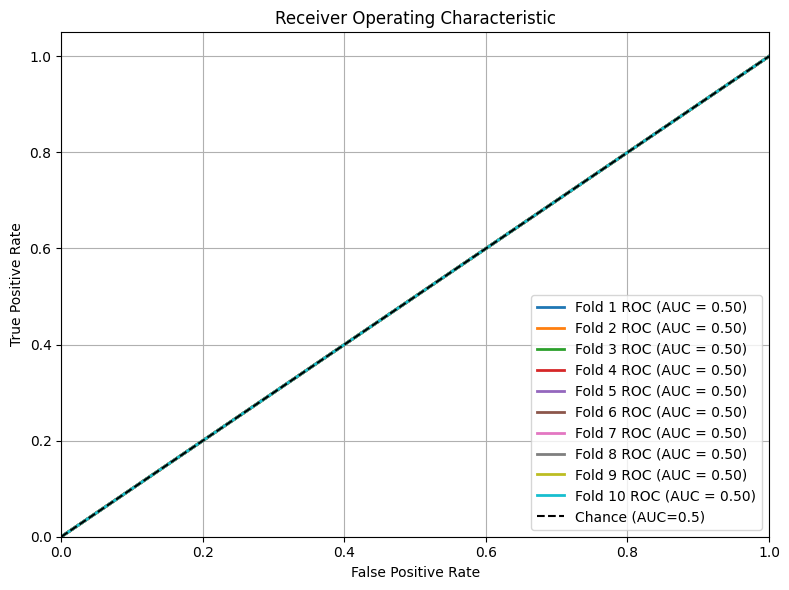

In [48]:
labels = [f'Fold {i+1} ROC (AUC = {auc:.2f})' for i, auc in enumerate(results_baseline['aucs'])]
plot_roc_curves(results_baseline['fprs'], results_baseline['tprs'], aucs=results_baseline['aucs'], labels=labels)

- All folds lie on the diagonal with AUC = 0.5, meaning the classifier has no discriminative power and performs like random guessing.

# Kernalized SVM

In [49]:
y = df_encoded["creditworthy"].replace(2, -1).to_numpy()
X = df_encoded.drop(columns=["creditworthy"]).to_numpy()

In [95]:
def rbf_kernel(X1, X2, gamma=0.1): # RBF Kernel Function
    X1_sq = np.sum(X1 ** 2, axis=1).reshape(-1, 1)
    X2_sq = np.sum(X2 ** 2, axis=1).reshape(1, -1)
    dist_sq = X1_sq + X2_sq - 2 * np.dot(X1, X2.T)
    return np.exp(-gamma * dist_sq)

def polynomial_kernel(X1, X2, degree=2, coef0=1): # Polynomial Kernel Function
    return (np.dot(X1, X2.T) + coef0) ** degree

def loss(h, y): #Hinge Loss
    l = np.maximum(0.0, 1.0 - y * h)
    g = np.where(l > 0.0, -y, 0.0)
    return l, g

def reg(alpha, K, lbda): #Regularization
    r = 0.5 * lbda * alpha.T.dot(K).dot(alpha)
    g = lbda * K.dot(alpha)
    return r, g

def learn_reg_ERM_kernel_custom(X, y, lbda, kernel_fn, T=1000, batch_size=50, seed=42):
    """
    Kernelized Pegasos-like stochastic subgradient on alpha (dual-like representation).
    """
    X = np.asarray(X, dtype=np.float64)
    y = np.asarray(y, dtype=np.int8)
    n = X.shape[0]
    rng = np.random.RandomState(seed)

    alpha = np.zeros(n, dtype=np.float64)
    K = kernel_fn(X, X).astype(np.float64)
    K += 1e-12 * np.eye(n)           # tiny jitter for numerical stability

    for t in range(1, T + 1):
        bsz = min(batch_size, n)     # safe compare now that n is int
        idx = rng.choice(n, size=bsz, replace=False)    # indices for this minibatch
        # compute scores for the chosen batch
        h_batch = K[idx].dot(alpha)   # shape (bsz,)
        y_batch = y[idx]

        # find hinge violators in the batch (those with y_i * h_i < 1)
        viol_mask = (y_batch * h_batch) < 1
        viol_idx = idx[viol_mask]     # indices in full alpha corresponding to violators

        eta = 1.0 / (lbda * t)        # Pegasos step-size

        # weight decay on alpha (equivalently (1 - eta*lbda) factor in primal)
        alpha *= (1 - eta * lbda)

        if viol_idx.size > 0:
            # update alpha at violator positions (add eta * y_i)
            alpha[viol_idx] += eta * y[viol_idx]

        
        if np.linalg.norm(alpha) > 1e8:
            # shrink and continue
            alpha *= 1e-6

    return alpha, K

def cross_validate_kernel_svm(
    X, y,
    lbda=0.1,
    kernel_fn=None,
    k_folds=5,
    threshold=0.0,
    T=1000,
    batch_size=50,
    seed=42
):
    # ensure arrays
    X = np.asarray(X, dtype=np.float64)
    y = np.asarray(y)
    # map labels: 1 -> +1, else -> -1 (adjust if your labels differ)
    y_binary = np.where(y == 1, 1, -1)

    skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=seed)

    val_losses, val_accuracies = [], []
    val_precisions, val_recalls, val_costs = [], [], []
    val_aucs, all_fprs, all_tprs = [], [], []

    for fold_idx, (train_idx, val_idx) in enumerate(skf.split(X, (y_binary == 1).astype(int)), 1):
        X_train, y_train = X[train_idx], y_binary[train_idx]
        X_val,   y_val   = X[val_idx],   y_binary[val_idx]

        alpha, K_train = learn_reg_ERM_kernel_custom(
            X_train, y_train, lbda, kernel_fn, T=T, batch_size=batch_size, seed=seed
        )

        K_val_train = kernel_fn(X_val, X_train)
        h_val = K_val_train.dot(alpha)

        # hinge loss (mean)
        l = np.maximum(0.0, 1.0 - y_val * h_val)
        val_losses.append(np.mean(l))

        # predictions (threshold on signed score)
        preds = np.where(h_val >= threshold, 1, -1)

        val_accuracies.append(np.mean(preds == y_val))
        val_precisions.append(precision_score(y_val, preds, pos_label=1, zero_division=0))
        val_recalls.append(recall_score(y_val, preds, pos_label=1, zero_division=0))

        # cost: 5*FP + 1*FN
        fp = np.sum((preds == 1) & (y_val == -1))
        fn = np.sum((preds == -1) & (y_val == 1))
        cost = 5 * fp + fn
        val_costs.append(cost)

        # AUC only if both classes present
        y_val_bin = (y_val == 1).astype(int)
        if len(np.unique(y_val_bin)) > 1:
            fpr, tpr, _= roc_curve(y_val_bin, h_val)
            auc_score = auc(fpr, tpr)
            all_fprs.append(fpr); all_tprs.append(tpr)
        else:
            auc_score = np.nan
            all_fprs.append(None); all_tprs.append(None)
        val_aucs.append(auc_score)

        print(f"Fold {fold_idx} | loss: {val_losses[-1]:.4f}, acc: {val_accuracies[-1]:.4f}, "
              f"prec: {val_precisions[-1]:.4f}, rec: {val_recalls[-1]:.4f}, "
              f"auc: {auc_score if not np.isnan(auc_score) else 'nan'}, cost: {cost}")

    print(f"Average loss: {np.nanmean(val_losses):.4f}")
    print(f"Average accuracy: {np.nanmean(val_accuracies):.4f}")
    print(f"Average precision: {np.nanmean(val_precisions):.4f}")
    print(f"Average recall: {np.nanmean(val_recalls):.4f}")
    print(f"Average AUC: {np.nanmean(val_aucs):.4f}")
    print(f"Average misclassification cost: {np.nanmean(val_costs):.2f}")

    return {
        "loss": np.nanmean(val_losses),
        "accuracy": np.nanmean(val_accuracies),
        "precision": np.nanmean(val_precisions),
        "recall": np.nanmean(val_recalls),
        "auc": np.nanmean(val_aucs),
        "cost": np.nanmean(val_costs),
        "fprs": all_fprs,
        "tprs": all_tprs,
        "aucs": val_aucs,
    }


def predict_kernel(alpha, K_test_train, threshold=0):
    h = K_test_train.dot(alpha)
    preds = np.where(h >= threshold, 1, -1)
    return preds, h

In [96]:
# Kernel parameters
gamma = 0.5
poly_degree = 2
poly_coef0 = 1

In [97]:
# Kernel function handles
rbf_kernel_fn = lambda X1, X2: rbf_kernel(X1, X2, gamma=gamma)
poly_kernel_fn = lambda X1, X2: polynomial_kernel(X1, X2, degree=poly_degree, coef0=poly_coef0)

# Run cross-validation for both kernels
print("RBF Kernel results:")
results_rbf = cross_validate_kernel_svm(X, y, lbda=0.1, kernel_fn=rbf_kernel_fn, k_folds=10)

print("\nPolynomial Kernel results:")
results_poly = cross_validate_kernel_svm(X, y, lbda=0.1, kernel_fn=poly_kernel_fn, k_folds=10)


RBF Kernel results:
Fold 1 | loss: 0.9628, acc: 0.6900, prec: 0.7191, rec: 0.9143, auc: 0.6542857142857142, cost: 131
Fold 2 | loss: 0.9463, acc: 0.6700, prec: 0.7079, rec: 0.9000, auc: 0.5828571428571429, cost: 137
Fold 3 | loss: 0.9281, acc: 0.7600, prec: 0.7614, rec: 0.9571, auc: 0.7528571428571428, cost: 108
Fold 4 | loss: 0.9361, acc: 0.7000, prec: 0.7222, rec: 0.9286, auc: 0.7804761904761905, cost: 130
Fold 5 | loss: 0.9378, acc: 0.7600, prec: 0.7674, rec: 0.9429, auc: 0.6785714285714286, cost: 104
Fold 6 | loss: 0.9482, acc: 0.7200, prec: 0.7386, rec: 0.9286, auc: 0.7680952380952382, cost: 120
Fold 7 | loss: 0.9293, acc: 0.7600, prec: 0.7738, rec: 0.9286, auc: 0.7623809523809525, cost: 100
Fold 8 | loss: 0.9469, acc: 0.7300, prec: 0.7312, rec: 0.9714, auc: 0.7028571428571428, cost: 127
Fold 9 | loss: 0.9374, acc: 0.7800, prec: 0.7791, rec: 0.9571, auc: 0.8276190476190477, cost: 98
Fold 10 | loss: 0.9612, acc: 0.7300, prec: 0.7363, rec: 0.9571, auc: 0.671904761904762, cost: 123
A

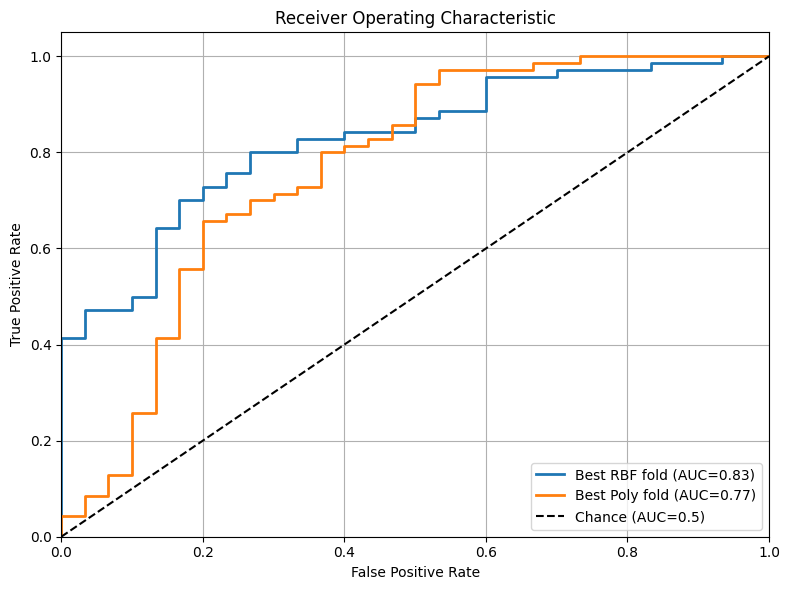

In [53]:
rbf_fprs = results_rbf["fprs"]
rbf_tprs = results_rbf["tprs"]
rbf_aucs = results_rbf["aucs"]

poly_fprs = results_poly["fprs"]
poly_tprs = results_poly["tprs"]
poly_aucs = results_poly["aucs"]

# Find indices of folds with maximum AUC for each kernel
max_rbf_idx = np.argmax(rbf_aucs)
max_poly_idx = np.argmax(poly_aucs)

# Select the best ROC curve data per kernel
fprs = [rbf_fprs[max_rbf_idx], poly_fprs[max_poly_idx]]
tprs = [rbf_tprs[max_rbf_idx], poly_tprs[max_poly_idx]]
aucs = [rbf_aucs[max_rbf_idx], poly_aucs[max_poly_idx]]
labels = [
    f'Best RBF fold (AUC={rbf_aucs[max_rbf_idx]:.2f})',
    f'Best Poly fold (AUC={poly_aucs[max_poly_idx]:.2f})'
]

# Plot using your function
plot_roc_curves(fprs, tprs, aucs=aucs, labels=labels)

- With untuned hyperparameters, RBF gets higher recall and accuracy but lower precision, leading to many false positives and a higher project cost (~117.8).

- The polynomial kernel trades some recall for better precision, achieves a slightly higher AUC (0.731 vs 0.718), and substantially lowers the cost (85.6), so it’s preferable under the 5×FP + 1×FN objective.

In [116]:
def nested_cross_validate_polynomial_kernel_svm(
    X, y,
    lbda_candidates,
    degree_candidates,
    coef0_candidates,
    threshold_candidates,
    outer_folds=5,
    inner_folds=3,
    random_seed=42,
):
    np.random.seed(random_seed)
    y_mapped = np.where(y == 2, -1, y)  # Map labels 2 -> -1, 1 -> 1
    outer_cv = StratifiedKFold(n_splits=outer_folds, shuffle=True, random_state=random_seed)
    outer_aucs = []
    outer_costs = []
    outer_accuracies = []
    outer_precisions = []
    outer_recalls = []
    all_y_true = []
    all_y_probs = []
    
    best_outer_cost = np.inf
    best_outer_params = None
    
    for outer_fold, (train_idx, test_idx) in enumerate(outer_cv.split(X, y_mapped), 1):
        X_outer_train, y_outer_train = X[train_idx], y_mapped[train_idx]
        X_outer_test, y_outer_test = X[test_idx], y_mapped[test_idx]
        best_inner_cost = np.inf
        best_params = None
        inner_cv = StratifiedKFold(n_splits=inner_folds, shuffle=True, random_state=random_seed)
        
        for lbda in lbda_candidates:
            for degree in degree_candidates:
                for coef0 in coef0_candidates:
                    for threshold in threshold_candidates:
                        inner_costs = []
                        for inner_train_idx, inner_val_idx in inner_cv.split(X_outer_train, y_outer_train):
                            X_inner_train, y_inner_train = X_outer_train[inner_train_idx], y_outer_train[inner_train_idx]
                            X_val, y_val = X_outer_train[inner_val_idx], y_outer_train[inner_val_idx]
                            kernel_fn = lambda A, B: polynomial_kernel(A, B, degree=degree, coef0=coef0)
                            alpha, _ = learn_reg_ERM_kernel_custom(X_inner_train, y_inner_train, lbda, kernel_fn)
                            K_val_train = kernel_fn(X_val, X_inner_train)
                            h_val = K_val_train.dot(alpha)
                            preds = np.where(h_val >= threshold, 1, -1)
                            fp = np.sum((preds == 1) & (y_val == -1))
                            fn = np.sum((preds == -1) & (y_val == 1))
                            fold_cost = 5 * fp + fn
                            inner_costs.append(fold_cost)
                        mean_inner_cost = np.mean(inner_costs)
                        if mean_inner_cost < best_inner_cost:
                            best_inner_cost = mean_inner_cost
                            best_params = {
                                'lbda': lbda,
                                'degree': degree,
                                'coef0': coef0,
                                'threshold': threshold
                            }
        
        # Final model training
        kernel_fn = lambda A, B: polynomial_kernel(A, B, degree=best_params['degree'], coef0=best_params['coef0'])
        alpha_final, _ = learn_reg_ERM_kernel_custom(X_outer_train, y_outer_train, best_params['lbda'], kernel_fn)
        K_test_train = kernel_fn(X_outer_test, X_outer_train)
        h_test = K_test_train.dot(alpha_final)
        preds_test = np.where(h_test >= best_params['threshold'], 1, -1)
        y_outer_test_binary = (y_outer_test == 1).astype(int)
        
        auc_score = roc_auc_score(y_outer_test_binary, h_test)
        fp_test = np.sum((preds_test == 1) & (y_outer_test == -1))
        fn_test = np.sum((preds_test == -1) & (y_outer_test == 1))
        cost_test = 5 * fp_test + fn_test
        
        accuracy_test = np.mean(preds_test == y_outer_test)
        precision_test = precision_score(y_outer_test, preds_test, pos_label=1, zero_division=0)
        recall_test = recall_score(y_outer_test, preds_test, pos_label=1, zero_division=0)
        
        # Track best outer fold parameters by cost
        if cost_test < best_outer_cost:
            best_outer_cost = cost_test
            best_outer_params = best_params
        
        print(f"Outer Fold {outer_fold}: Best params: {best_params} | AUC: {auc_score:.3f} | Cost: {cost_test} | "
              f"Accuracy: {accuracy_test:.3f} | Precision: {precision_test:.3f} | Recall: {recall_test:.3f}")
        
        outer_aucs.append(auc_score)
        outer_costs.append(cost_test)
        outer_accuracies.append(accuracy_test)
        outer_precisions.append(precision_test)
        outer_recalls.append(recall_test)
        all_y_true.append(y_outer_test_binary)
        all_y_probs.append(h_test)
        
    print(f"Average accuracy across outer folds: {np.mean(outer_accuracies):.3f}")
    print(f"Average precision across outer folds: {np.mean(outer_precisions):.3f}")
    print(f"Average recall across outer folds: {np.mean(outer_recalls):.3f}")
    print(f"\nAverage AUC across outer folds: {np.mean(outer_aucs):.3f}")
    print(f"Average misclassification cost across outer folds: {np.mean(outer_costs):.2f}")
    print("\nBest hyperparameters by lowest outer fold cost:")
    print(best_outer_params)
    
    plot_precision_recall_curves(all_y_true, all_y_probs)
    return outer_aucs, outer_costs, outer_accuracies, outer_precisions, outer_recalls


Outer Fold 1: Best params: {'lbda': 1, 'degree': 2, 'coef0': 0, 'threshold': 0.8} | AUC: 0.752 | Cost: 69 | Accuracy: 0.670 | Precision: 0.836 | Recall: 0.657
Outer Fold 2: Best params: {'lbda': 1, 'degree': 2, 'coef0': 1, 'threshold': 0.8} | AUC: 0.704 | Cost: 78 | Accuracy: 0.620 | Precision: 0.808 | Recall: 0.600
Outer Fold 3: Best params: {'lbda': 1, 'degree': 2, 'coef0': 1, 'threshold': 0.8} | AUC: 0.778 | Cost: 65 | Accuracy: 0.670 | Precision: 0.849 | Recall: 0.643
Outer Fold 4: Best params: {'lbda': 1, 'degree': 2, 'coef0': 0, 'threshold': 0.8} | AUC: 0.661 | Cost: 80 | Accuracy: 0.640 | Precision: 0.804 | Recall: 0.643
Outer Fold 5: Best params: {'lbda': 1, 'degree': 2, 'coef0': 0, 'threshold': 0.8} | AUC: 0.719 | Cost: 68 | Accuracy: 0.640 | Precision: 0.840 | Recall: 0.600
Outer Fold 6: Best params: {'lbda': 1, 'degree': 2, 'coef0': 0, 'threshold': 0.8} | AUC: 0.783 | Cost: 58 | Accuracy: 0.700 | Precision: 0.870 | Recall: 0.671
Outer Fold 7: Best params: {'lbda': 1, 'degree

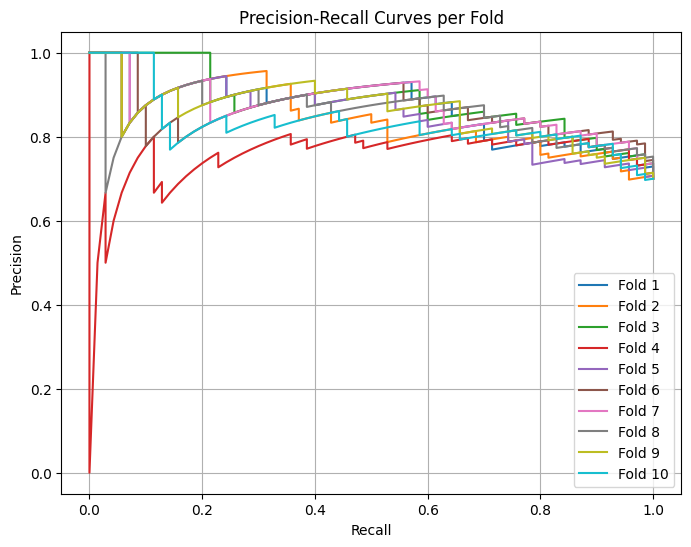

([0.7519047619047619,
  0.7038095238095238,
  0.7776190476190475,
  0.660952380952381,
  0.7185714285714285,
  0.7828571428571429,
  0.7804761904761904,
  0.7623809523809524,
  0.7485714285714287,
  0.7080952380952381],
 [69, 78, 65, 80, 68, 58, 70, 74, 69, 82],
 [0.67, 0.62, 0.67, 0.64, 0.64, 0.7, 0.7, 0.7, 0.67, 0.74],
 [0.8363636363636363,
  0.8076923076923077,
  0.8490566037735849,
  0.8035714285714286,
  0.84,
  0.8703703703703703,
  0.8333333333333334,
  0.8225806451612904,
  0.8363636363636363,
  0.8055555555555556],
 [0.6571428571428571,
  0.6,
  0.6428571428571429,
  0.6428571428571429,
  0.6,
  0.6714285714285714,
  0.7142857142857143,
  0.7285714285714285,
  0.6571428571428571,
  0.8285714285714286])

In [117]:
nested_cross_validate_polynomial_kernel_svm(
    X, y,
    lbda_candidates=[0.001, 0.01, 0.1,1],
    degree_candidates=[2, 3],
    coef0_candidates=[0, 1],
    threshold_candidates=[-0.3, 0.0, 0.3, 0.5, 0.7, 0.8],
    outer_folds=10,
    inner_folds=5
)

- The nested cross‑validation settled most often on a polynomial kernel with degree 2, λ=1, and a high decision threshold (~0.8), yielding mean AUC ≈ 0.739 and providing an unbiased estimate of generalization because hyperparameter search was contained inside the outer CV loop.
  
- An AUC around 0.74 indicates meaningful discrimination above chance (0.5), while the higher threshold reduces false positives—which are 5× costlier in the objective—thereby lowering the average misclassification cost to ≈71.3 across folds.

## Best Polynomial Kernel SVM

In [103]:
kernel_fn = lambda X1, X2: polynomial_kernel(X1, X2, degree=2, coef0=0)
results_svm_poly = cross_validate_kernel_svm(
    X, y,
    lbda=1,
    kernel_fn=kernel_fn,
    k_folds=10,
    threshold=0.8 # Use best threshold found
)

Fold 1 | loss: 0.6988, acc: 0.6700, prec: 0.8364, rec: 0.6571, auc: 0.7519047619047619, cost: 69
Fold 2 | loss: 0.7979, acc: 0.6400, prec: 0.8148, rec: 0.6286, auc: 0.6985714285714285, cost: 76
Fold 3 | loss: 0.6206, acc: 0.6700, prec: 0.8491, rec: 0.6429, auc: 0.7747619047619048, cost: 65
Fold 4 | loss: 0.7993, acc: 0.6400, prec: 0.8036, rec: 0.6429, auc: 0.660952380952381, cost: 80
Fold 5 | loss: 0.7607, acc: 0.6400, prec: 0.8400, rec: 0.6000, auc: 0.7185714285714285, cost: 68
Fold 6 | loss: 0.6118, acc: 0.7000, prec: 0.8704, rec: 0.6714, auc: 0.7828571428571429, cost: 58
Fold 7 | loss: 0.6063, acc: 0.6800, prec: 0.8276, rec: 0.6857, auc: 0.7861904761904762, cost: 72
Fold 8 | loss: 0.6605, acc: 0.7000, prec: 0.8226, rec: 0.7286, auc: 0.7623809523809524, cost: 74
Fold 9 | loss: 0.6862, acc: 0.6500, prec: 0.8302, rec: 0.6286, auc: 0.75, cost: 71
Fold 10 | loss: 0.6847, acc: 0.7000, prec: 0.8448, rec: 0.7000, auc: 0.7466666666666667, cost: 66
Average loss: 0.6927
Average accuracy: 0.669

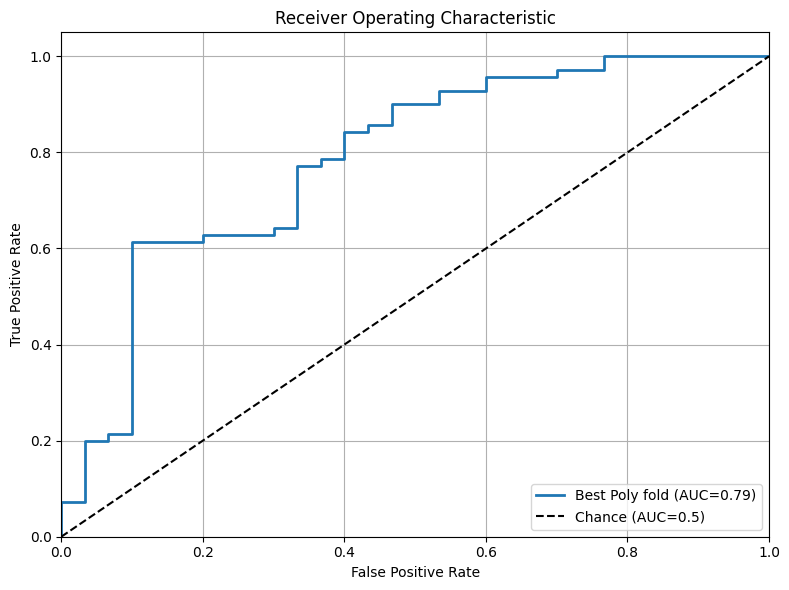

In [104]:
poly_fprs = results_svm_poly["fprs"]
poly_tprs = results_svm_poly["tprs"]
poly_aucs = results_svm_poly["aucs"]

# Find indices of folds with maximum AUC for each kernel
max_poly_idx = np.argmax(poly_aucs)

# Select the best ROC curve data per kernel
fprs = [poly_fprs[max_poly_idx]]
tprs = [poly_tprs[max_poly_idx]]
aucs = [poly_aucs[max_poly_idx]]
labels = [
    f'Best Poly fold (AUC={poly_aucs[max_poly_idx]:.2f})'
]

# Plot using your function
plot_roc_curves(fprs, tprs, aucs=aucs, labels=labels)

- With degree=2, coef0=0, λ=1, and a high threshold of 0.8, the polynomial SVM shows solid discrimination (AUC ≈ 0.743) and leans toward precision (≈0.83) over recall (≈0.65), which fits a 5× false‑positive penalty by suppressing FPs.

- This model delivers a low average misclassification cost (~69.9), making it more cost‑efficient than the baseline and better than untuned Polynomial Kernel SVM

In [102]:
#Set best hyperparameters
best_lbda = 1
best_degree = 2
best_coef0 = 0
best_threshold = 0.8  # Your best threshold from cross-validation

# Define kernel function with best params
kernel_fn = lambda X1, X2: polynomial_kernel(X1, X2, degree=best_degree, coef0=best_coef0)

# Learn on full dataset
alpha, K = learn_reg_ERM_kernel_custom(X, y, best_lbda, kernel_fn)

# Predict on new data using:
# K_test_train = kernel_fn(X_test, X)  # compute kernel between test and train
# preds, scores = predict_kernel(alpha, K_test_train, threshold=best_threshold)


# Random Forest

In [111]:
def cross_validate_random_forest(
    X, y,
    n_estimators=100,
    max_depth=None,
    k_folds=5,
    threshold=0.3,
    random_seed=42,
    class_weight="balanced"
):
    X = np.asarray(X)
    y = np.asarray(y)
    # Map y=1 -> 1 ("good"), y=-1 -> 0 ("bad")
    y_mapped = (y + 1) // 2

    skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=random_seed)

    accuracies, precisions, recalls, aucs, costs = [], [], [], [], []
    all_fprs, all_tprs = [], []

    for fold_idx, (train_idx, val_idx) in enumerate(skf.split(X, y_mapped), start=1):
        X_train, y_train = X[train_idx], y_mapped[train_idx]
        X_val,   y_val   = X[val_idx],   y_mapped[val_idx]

        clf = RandomForestClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            random_state=(random_seed + fold_idx),
            n_jobs=-1,
            class_weight=class_weight
        )
        clf.fit(X_train, y_train)

        # probability for the positive class (1)
        y_probs = clf.predict_proba(X_val)[:, 1]
        y_pred = np.where(y_probs >= threshold, 1, 0)

        # Standard metrics
        accuracies.append(metrics.accuracy_score(y_val, y_pred))
        precisions.append(metrics.precision_score(y_val, y_pred, zero_division=0))
        recalls.append(metrics.recall_score(y_val, y_pred, zero_division=0))

        # AUC only if both classes are present in the validation fold
        if len(np.unique(y_val)) > 1:
            fpr, tpr, _ = metrics.roc_curve(y_val, y_probs)
            auc_score = metrics.auc(fpr, tpr)
            all_fprs.append(fpr)
            all_tprs.append(tpr)
        else:
            fpr, tpr = None, None
            auc_score = np.nan
            all_fprs.append(None)
            all_tprs.append(None)

        aucs.append(auc_score)

        # Cost-sensitive metrics
        fp = np.sum((y_pred == 1) & (y_val == 0))   # Predicted good, actually bad
        fn = np.sum((y_pred == 0) & (y_val == 1))   # Predicted bad, actually good
        fold_cost = 5 * fp + 1 * fn
        costs.append(fold_cost)

        print(
            f"Fold {fold_idx} — Accuracy: {accuracies[-1]:.4f}, "
            f"Precision: {precisions[-1]:.4f}, Recall: {recalls[-1]:.4f}, "
            f"AUC: {auc_score if not np.isnan(auc_score) else 'nan'}, Cost: {fold_cost}"
        )

    print(f"\nAverage metrics over {k_folds} folds:")
    print(f"Accuracy: {np.mean(accuracies):.4f}")
    print(f"Precision: {np.mean(precisions):.4f}")
    print(f"Recall: {np.mean(recalls):.4f}")
    print(f"AUC: {np.nanmean(aucs):.4f}")
    print(f"Average Misclassification Cost: {np.mean(costs):.2f}")

    return {
        'accuracy': np.mean(accuracies),
        'precision': np.mean(precisions),
        'recall': np.mean(recalls),
        'auc': np.nanmean(aucs),
        'fprs': all_fprs,
        'tprs': all_tprs,
        'aucs': aucs,
        'costs': costs,
        'avg_cost': np.mean(costs)
    }

In [112]:
results_rf = cross_validate_random_forest(
    X, y,
    n_estimators=100,
    max_depth=None,
    k_folds=10,
    threshold=0.5,
    random_seed=42,
    class_weight="balanced"
)

Fold 1 — Accuracy: 0.7400, Precision: 0.7558, Recall: 0.9286, AUC: 0.795952380952381, Cost: 110
Fold 2 — Accuracy: 0.6900, Precision: 0.7294, Recall: 0.8857, AUC: 0.725, Cost: 123
Fold 3 — Accuracy: 0.7900, Precision: 0.7882, Recall: 0.9571, AUC: 0.8385714285714285, Cost: 93
Fold 4 — Accuracy: 0.7400, Precision: 0.7619, Recall: 0.9143, AUC: 0.7790476190476191, Cost: 106
Fold 5 — Accuracy: 0.7500, Precision: 0.7711, Recall: 0.9143, AUC: 0.7642857142857143, Cost: 101
Fold 6 — Accuracy: 0.7200, Precision: 0.7442, Recall: 0.9143, AUC: 0.7738095238095238, Cost: 116
Fold 7 — Accuracy: 0.8400, Precision: 0.8462, Recall: 0.9429, AUC: 0.8104761904761906, Cost: 64
Fold 8 — Accuracy: 0.7600, Precision: 0.7738, Recall: 0.9286, AUC: 0.771904761904762, Cost: 100
Fold 9 — Accuracy: 0.7900, Precision: 0.8182, Recall: 0.9000, AUC: 0.8423809523809525, Cost: 77
Fold 10 — Accuracy: 0.7800, Precision: 0.7857, Recall: 0.9429, AUC: 0.8142857142857143, Cost: 94

Average metrics over 10 folds:
Accuracy: 0.7600

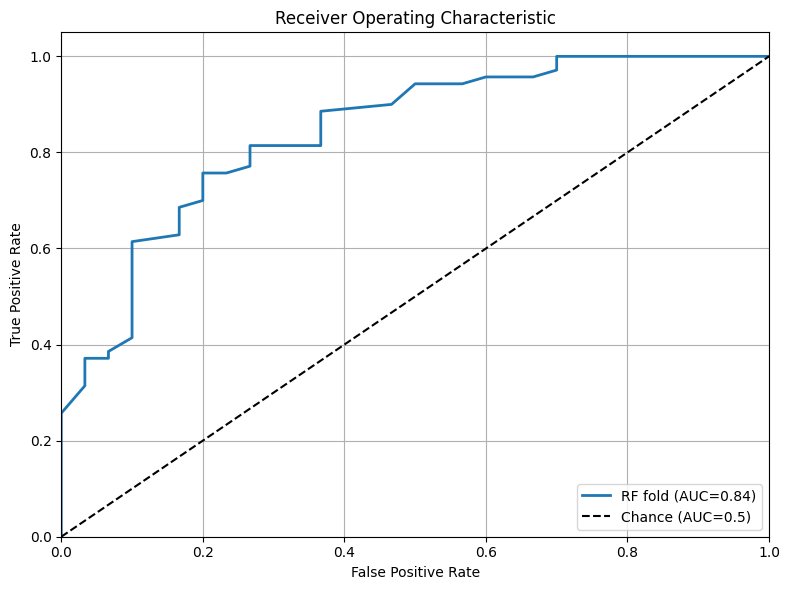

In [113]:
rf_fprs = results_rf["fprs"]
rf_tprs = results_rf["tprs"]
rf_aucs = results_rf["aucs"]

# Find indices of folds with maximum AUC for each kernel
max_rf_idx = np.argmax(rf_aucs)

# Select the best ROC curve data per kernel
fprs = [rf_fprs[max_rf_idx]]
tprs = [rf_tprs[max_rf_idx]]
aucs = [rf_aucs[max_rf_idx]]
labels = [
    f'RF fold (AUC={rf_aucs[max_rf_idx]:.2f})'
]

# Plot using your function
plot_roc_curves(fprs, tprs, aucs=aucs, labels=labels)

- Untuned Random Forest shows strong recall and solid AUC (~0.79), but the high false‑positive rate drives the average project cost to ~98.4, notably worse than the tuned polynomial SVM seen earlier

In [93]:
def nested_cross_validate_random_forest(
    X,
    y,
    n_estimators_candidates,
    max_depth_candidates,
    threshold_candidates,
    outer_folds=5,
    inner_folds=3,
    random_seed=42
):
    np.random.seed(random_seed)
    y_mapped = (y + 1) // 2  # map y=1->1 (good), y=2->0 (bad)
    
    outer_cv = StratifiedKFold(n_splits=outer_folds, shuffle=True, random_state=random_seed)
    outer_results = []
    all_y_true = []
    all_y_probs = []
    
    # Track best hyperparams and cost based on outer fold evaluation
    best_outer_cost = np.inf
    best_hyperparams_outer = None
    
    for outer_fold, (train_idx, test_idx) in enumerate(outer_cv.split(X, y_mapped), 1):
        X_outer_train, y_outer_train = X[train_idx], y_mapped[train_idx]
        X_outer_test, y_outer_test = X[test_idx], y_mapped[test_idx]
        
        best_inner_cost = np.inf
        best_params = None
        
        inner_cv = StratifiedKFold(n_splits=inner_folds, shuffle=True, random_state=random_seed)
        
        for n_estimators in n_estimators_candidates:
            for max_depth in max_depth_candidates:
                for threshold in threshold_candidates:
                    inner_costs = []
                    for inner_train_idx, inner_val_idx in inner_cv.split(X_outer_train, y_outer_train):
                        X_inner_train, y_inner_train = X_outer_train[inner_train_idx], y_outer_train[inner_train_idx]
                        X_val, y_val = X_outer_train[inner_val_idx], y_outer_train[inner_val_idx]
                        clf = RandomForestClassifier(
                            n_estimators=n_estimators,
                            max_depth=max_depth,
                            random_state=random_seed
                        )
                        clf.fit(X_inner_train, y_inner_train)
                        y_probs = clf.predict_proba(X_val)[:, 1]
                        y_pred = np.where(y_probs >= threshold, 1, 0)
                        fp = np.sum((y_pred == 1) & (y_val == 0))
                        fn = np.sum((y_pred == 0) & (y_val == 1))
                        fold_cost = 5 * fp + 1 * fn
                        inner_costs.append(fold_cost)
                    mean_inner_cost = np.mean(inner_costs)
                    if mean_inner_cost < best_inner_cost:
                        best_inner_cost = mean_inner_cost
                        best_params = {
                            "n_estimators": n_estimators,
                            "max_depth": max_depth,
                            "threshold": threshold,
                        }
        
        # Train final model on outer train with best hyperparameters
        clf_final = RandomForestClassifier(
            n_estimators=best_params["n_estimators"],
            max_depth=best_params["max_depth"],
            random_state=random_seed,
        )
        clf_final.fit(X_outer_train, y_outer_train)
        y_probs_test = clf_final.predict_proba(X_outer_test)[:, 1]
        y_pred_test = np.where(y_probs_test >= best_params["threshold"], 1, 0)
        
        # Collect for PR plotting
        all_y_true.append(y_outer_test)
        all_y_probs.append(y_probs_test)
        
        # Compute metrics
        acc_test = accuracy_score(y_outer_test, y_pred_test)
        prec_test = precision_score(y_outer_test, y_pred_test, zero_division=0)
        rec_test = recall_score(y_outer_test, y_pred_test, zero_division=0)
        auc_test = roc_auc_score(y_outer_test, y_probs_test)
        fp_test = np.sum((y_pred_test == 1) & (y_outer_test == 0))
        fn_test = np.sum((y_pred_test == 0) & (y_outer_test == 1))
        cost_test = 5 * fp_test + fn_test
        
        # Update best hyperparams based on outer fold cost
        if cost_test < best_outer_cost:
            best_outer_cost = cost_test
            best_hyperparams_outer = best_params
        
        print(
            f"Outer Fold {outer_fold}: Best params: {best_params} | Test Acc: {acc_test:.3f}, "
            f"Prec: {prec_test:.3f}, Rec: {rec_test:.3f}, AUC: {auc_test:.3f}, Cost: {cost_test}"
        )
        outer_results.append(
            {
                "fold": outer_fold,
                "params": best_params,
                "accuracy": acc_test,
                "precision": prec_test,
                "recall": rec_test,
                "auc": auc_test,
                "fp": fp_test,
                "fn": fn_test,
                "cost": cost_test,
            }
        )
    
    avg_acc = np.mean([r["accuracy"] for r in outer_results])
    avg_prec = np.mean([r["precision"] for r in outer_results])
    avg_rec = np.mean([r["recall"] for r in outer_results])
    avg_auc = np.mean([r["auc"] for r in outer_results])
    avg_cost = np.mean([r["cost"] for r in outer_results])
    
    print(f"\nAverage over {outer_folds} outer folds:")
    print(f"Accuracy: {avg_acc:.3f}")
    print(f"Precision: {avg_prec:.3f}")
    print(f"Recall: {avg_rec:.3f}")
    print(f"AUC: {avg_auc:.3f}")
    print(f"Average Cost: {avg_cost:.2f}")
    
    print(f"\nBest overall hyperparameters by lowest cost during outer CV:")
    print(best_hyperparams_outer)
    
    plot_precision_recall_curves(all_y_true, all_y_probs)
    
    return outer_results


Outer Fold 1: Best params: {'n_estimators': 50, 'max_depth': 10, 'threshold': 0.8} | Test Acc: 0.570, Prec: 0.909, Rec: 0.429, AUC: 0.795, Cost: 55
Outer Fold 2: Best params: {'n_estimators': 50, 'max_depth': 10, 'threshold': 0.8} | Test Acc: 0.540, Prec: 0.833, Rec: 0.429, AUC: 0.690, Cost: 70
Outer Fold 3: Best params: {'n_estimators': 100, 'max_depth': 10, 'threshold': 0.8} | Test Acc: 0.600, Prec: 0.917, Rec: 0.471, AUC: 0.849, Cost: 52
Outer Fold 4: Best params: {'n_estimators': 50, 'max_depth': 20, 'threshold': 0.8} | Test Acc: 0.640, Prec: 0.886, Rec: 0.557, AUC: 0.775, Cost: 56
Outer Fold 5: Best params: {'n_estimators': 150, 'max_depth': 10, 'threshold': 0.8} | Test Acc: 0.600, Prec: 0.941, Rec: 0.457, AUC: 0.770, Cost: 48
Outer Fold 6: Best params: {'n_estimators': 100, 'max_depth': None, 'threshold': 0.8} | Test Acc: 0.610, Prec: 0.943, Rec: 0.471, AUC: 0.790, Cost: 47
Outer Fold 7: Best params: {'n_estimators': 100, 'max_depth': 10, 'threshold': 0.8} | Test Acc: 0.530, Prec

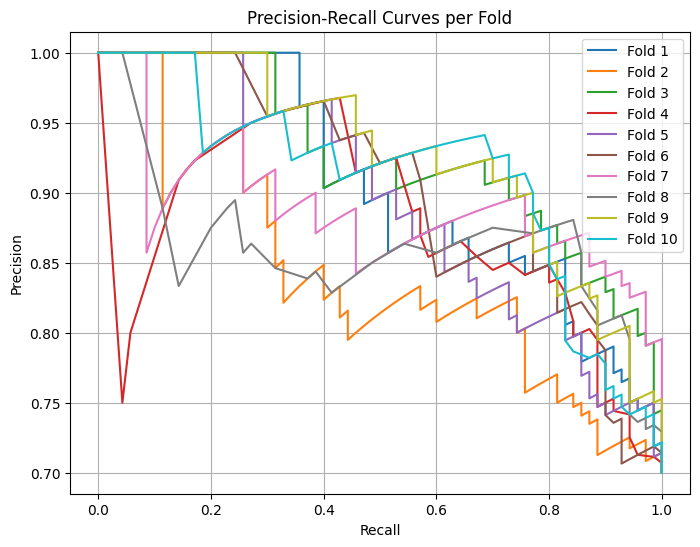

In [94]:
n_estimators_candidates = [50, 100, 150, 200]
max_depth_candidates = [None, 10, 20]
threshold_candidates = [0.5, 0.7, 0.8, 0.9]

results = nested_cross_validate_random_forest(
    X, y,
    n_estimators_candidates,
    max_depth_candidates,
    threshold_candidates,
    outer_folds=10,
    inner_folds=6,
    random_seed=42
)

- Nested CV consistently selected a high decision threshold (~0.8) with Random Forest settings around n_estimators 200–500 and max_depth ≈10/None, which prioritizes precision and slashes false positives under the 5× FP penalty.

# Best Random Forest Model

In [115]:
# Best parameters
best_n_estimators = 100
best_max_depth = None
best_threshold = 0.8

# Evaluate model using cross-validation with best parameters
results_rf_best = cross_validate_random_forest(
    X, y,
    n_estimators=best_n_estimators,
    max_depth=best_max_depth,
    k_folds=10,
    threshold=best_threshold,
    random_seed=42,
    class_weight="balanced"
)

Fold 1 — Accuracy: 0.6400, Precision: 0.9474, Recall: 0.5143, AUC: 0.795952380952381, Cost: 44
Fold 2 — Accuracy: 0.6000, Precision: 0.8947, Recall: 0.4857, AUC: 0.725, Cost: 56
Fold 3 — Accuracy: 0.6200, Precision: 0.9211, Recall: 0.5000, AUC: 0.8385714285714285, Cost: 50
Fold 4 — Accuracy: 0.6400, Precision: 0.8864, Recall: 0.5571, AUC: 0.7790476190476191, Cost: 56
Fold 5 — Accuracy: 0.6100, Precision: 0.9429, Recall: 0.4714, AUC: 0.7642857142857143, Cost: 47
Fold 6 — Accuracy: 0.5800, Precision: 0.8684, Recall: 0.4714, AUC: 0.7738095238095238, Cost: 62
Fold 7 — Accuracy: 0.5200, Precision: 0.8235, Recall: 0.4000, AUC: 0.8104761904761906, Cost: 72
Fold 8 — Accuracy: 0.5600, Precision: 0.8421, Recall: 0.4571, AUC: 0.771904761904762, Cost: 68
Fold 9 — Accuracy: 0.6200, Precision: 0.9211, Recall: 0.5000, AUC: 0.8423809523809525, Cost: 50
Fold 10 — Accuracy: 0.6400, Precision: 0.9250, Recall: 0.5286, AUC: 0.8142857142857143, Cost: 48

Average metrics over 10 folds:
Accuracy: 0.6030
Preci

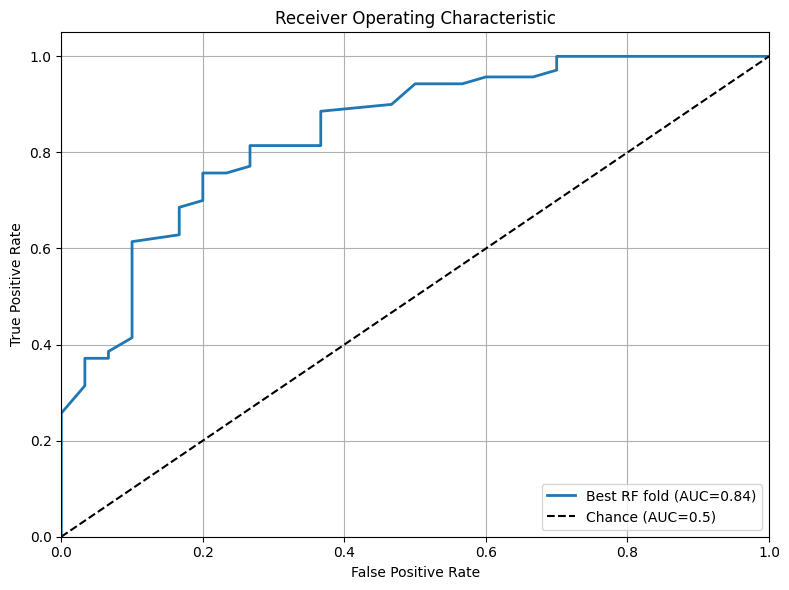

In [114]:
rf_fprs = results_rf_best["fprs"]
rf_tprs = results_rf_best["tprs"]
rf_aucs = results_rf_best["aucs"]

# Find indices of folds with maximum AUC for each kernel
max_rf_idx = np.argmax(rf_aucs)

# Select the best ROC curve data per kernel
fprs = [rf_fprs[max_rf_idx]]
tprs = [rf_tprs[max_rf_idx]]
aucs = [rf_aucs[max_rf_idx]]
labels = [
    f'Best RF fold (AUC={rf_aucs[max_rf_idx]:.2f})'
]

# Plot using your function
plot_roc_curves(fprs, tprs, aucs=aucs, labels=labels)

- Across all 10 folds, the Random Forest exhibits excellent precision (0.89) and solid AUC (0.79), but relatively low recall (0.48), reflecting that it prioritizes cost efficiency (minimizing false positives) at the expense of fewer true positives detected, this leads to the lowest misclassification cost (55.30) under the cost-sensitive settings.
- The ROC curve for the best Random Forest fold (AUC=0.84) demonstrates strong class separation, with high true positive rates consistently achieved for moderate false positive rates, confirming that the model ranks positives higher than negatives across thresholds in this fold.

In [90]:
best_n_estimators = 100
best_max_depth = None
best_threshold = 0.8

final_model = RandomForestClassifier(
    n_estimators=best_n_estimators,
    max_depth=best_max_depth,
    random_state=42, 
    n_jobs=-1
)

# Train on the full dataset
final_model.fit(X, y)

RandomForestClassifier(n_jobs=-1, random_state=42)

# Conclusion

| Model                                   | AUC    | Avg cost (5·FP + 1·FN) |
|----------------------------------------|--------|------------------------|
| Baseline (majority)                     | 0.50   | 150.00                 |
| Best Polynomial SVM (deg=2, coeff=0, λ=1, thr=0.8) | 0.74 | 69.90               |
| Best Random Forest (100 trees, depth=10, thr=0.8, balanced) | 0.79 | 55.30                 |


The best model is the **Random Forest** with tuned hyperparameters (100 trees, max depth 10, threshold 0.8, class_weight balanced), as it achieves the **highest AUC (0.7916)** and the **lowest average misclassification cost (55.3)**, indicating better overall discrimination and cost efficiency compared to the polynomial SVM and the baseline.